### **Importing Nesscery NLP , Computational & Visulization Liberies**

In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

### **Loading and prepraing data**

In [ ]:
iris_data = load_iris()
X_data = iris_data.data
y_data = iris_data.target

# Spliting the data into training and testing data
X_train, X_test, y_train, y_test, = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Bulding the Model**

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu', input_shape = (X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(3, activation='softmax'))

# Comapling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

### **Training the Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/100
4/4 [==============================] - 2s 107ms/step - loss: 1.1868 - accuracy: 0.3333 - val_loss: 1.1680 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 1.1516 - accuracy: 0.3333 - val_loss: 1.1351 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 23ms/step - loss: 1.1229 - accuracy: 0.3333 - val_loss: 1.1127 - val_accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 1.1025 - accuracy: 0.5333 - val_loss: 1.0934 - val_accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0825 - accuracy: 0.6167 - val_loss: 1.0737 - val_accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 1.0618 - accuracy: 0.6250 - val_loss: 1.0534 - val_accuracy: 0.6333
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0393 - accuracy: 0.6167 - val_loss: 1.0314 - val_accuracy: 0.6333
Epoch 8/100
4/4 [==

### Evaluating the  Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4}')

1/1 [==============================] - 1s 828ms/step - loss: 0.1532 - accuracy: 0.9667
Test accuracy: 0.9667


### **Making Prediction & Printing Classificalion_Report**

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

1/1 [==============================] - 0s 302ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



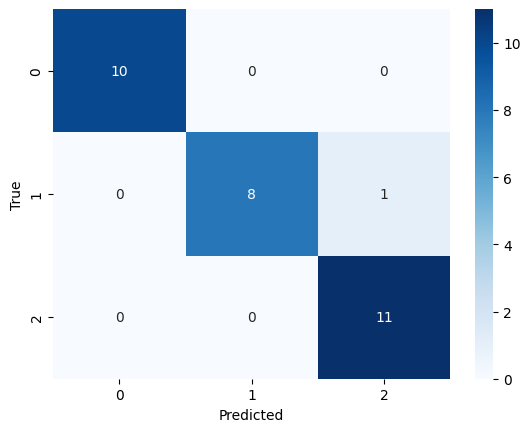

In [ ]:
# Assuming y_test and y_pred_classes are defined

conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


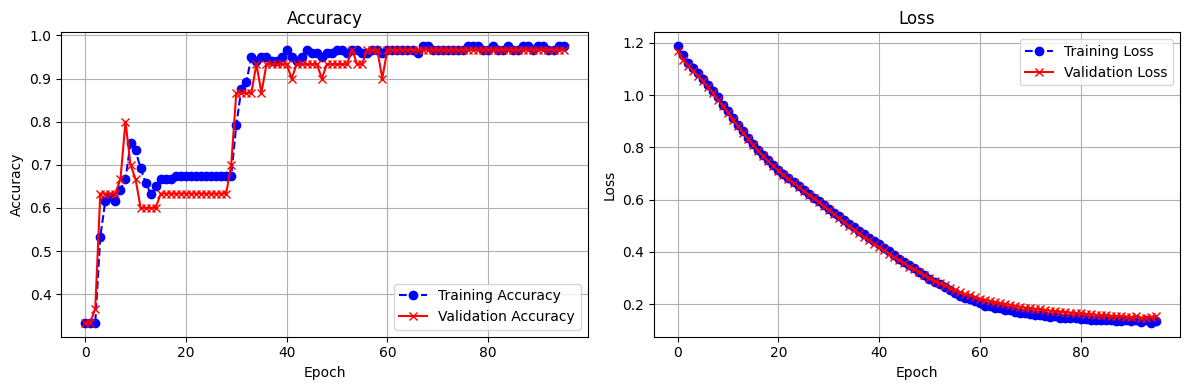

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='blue', linestyle='dashed', marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', linestyle='-', marker='x', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='blue', linestyle='dashed', marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', linestyle='-', marker='x', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjusts subplot spacing
plt.show()
